In [45]:
import pandas as pd 
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [46]:
data = pd.read_csv('690a-vazao-vila-aurea-20-04-2016.csv')

data_matrix = data.as_matrix()

data_matrix = data_matrix[340519:,2:]        # Elimina os termos nan da matriz

#data_matrix = np.nan_to_num(data_matrix)    # Tentei usar este comando para eliminar o 
                                             # termo nan, porém não funcionou                              
minutos = data_matrix.shape[0]

print "Total de minutos:", minutos

#print data_matrix

data_convolution = np.array(data_matrix).ravel()

print data_convolution.size

Total de minutos: 186238
186238


In [47]:
# smoothing an array that represents the time serie.
def smooth(x, window_len, window='hanning'):


    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."

    if window_len < 3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"

    s=np.r_[2*x[0]-x[window_len:1:-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    #print(len(s))
    
    if window == 'flat': #moving average
        w = np.ones(window_len,'d')
    else:
        w = getattr(np, window)(window_len)
    y = np.convolve(w/w.sum(), s, mode='same')
    return y[window_len-1:-window_len+1]

In [48]:
def plot_grafico1(data_convolution, qtde_minutos, janela): 

    minutos = data_convolution.size
    
    data_convolution = smooth(data_convolution, janela, window='hanning')
    
    indice = minutos - qtde_minutos

    x = np.arange(1, qtde_minutos + 1, 1)
    y = data_convolution[indice:]
    
    plt.plot(x, y, color = 'purple')

    plt.title(u' Convolução 1d da vazão com janela %i'%(janela), fontsize = 20)
    plt.xlabel('%i minutos mais recentes'%(qtde_minutos), fontsize = 20)
    plt.ylabel(u'Vazão',  fontsize = 20)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 12.5)

    plt.show() 

In [49]:
def plot_grafico2(data_convolution, qtde_minutos, janela1, janela2): 

    minutos = data_convolution.size
    
    data_convolution1 = smooth(data_convolution, janela1, window='hanning')
    data_convolution2 = smooth(data_convolution, janela2, window='hanning')
    
    indice = minutos - qtde_minutos

    x = np.arange(1, qtde_minutos + 1, 1)
    y1 = data_convolution1[indice:]
    y2 = data_convolution2[indice:]
    
    plt.plot(x, y1, label = 'Janela %i'%(janela1), color = 'red')
    plt.plot(x, y2, label = 'Janela %i'%(janela2), color = 'blue')
    
    plt.legend(loc = 'upper right', fontsize = 'xx-large')

    plt.title(u' Convolução 1d da vazão com janelas %i e %i'%(janela1, janela2), fontsize = 20)
    plt.xlabel('%i minutos mais recentes'%(qtde_minutos), fontsize = 20)
    plt.ylabel(u'Vazão',  fontsize = 20)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 12.5)

    plt.show() 

In [50]:
def plot_grafico3(data_convolution, qtde_minutos, janela1, janela2, janela3): 

    minutos = data_convolution.size
    
    data_convolution1 = smooth(data_convolution, janela1, window='hanning')
    data_convolution2 = smooth(data_convolution, janela2, window='hanning')
    data_convolution3 = smooth(data_convolution, janela3, window='hanning')
    
    indice = minutos - qtde_minutos

    x = np.arange(1, qtde_minutos + 1, 1)
    y1 = data_convolution1[indice:]
    y2 = data_convolution2[indice:]
    y3 = data_convolution3[indice:]
    
    plt.plot(x, y1, label = 'Janela %i'%(janela1), color = 'orange')
    plt.plot(x, y2, label = 'Janela %i'%(janela2), color = 'blue')
    plt.plot(x, y3, label = 'Janela %i'%(janela3), color = 'red')
    
    plt.legend(loc = 'upper right', fontsize = 'xx-large')

    plt.title(u' Convolução 1d da vazão com janelas %i, %i e %i'%(janela1, janela2, janela3), fontsize = 20)
    plt.xlabel('%i minutos mais recentes'%(qtde_minutos), fontsize = 20)
    plt.ylabel(u'Vazão',  fontsize = 20)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 12.5)

    plt.show() 

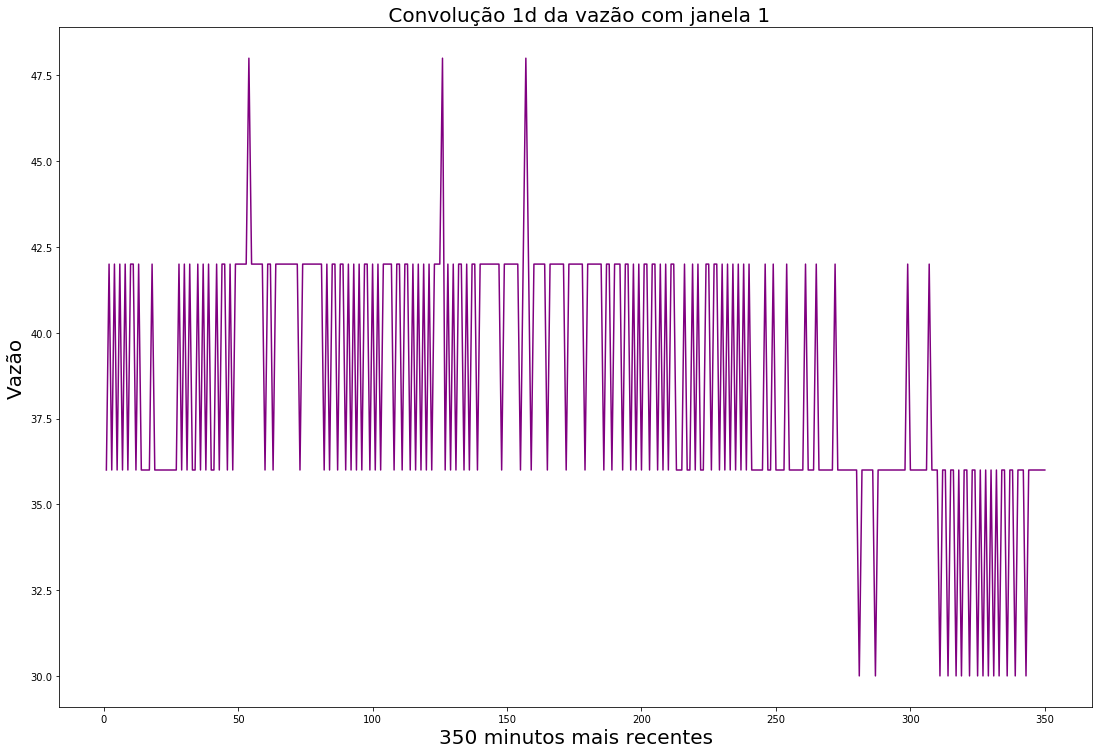

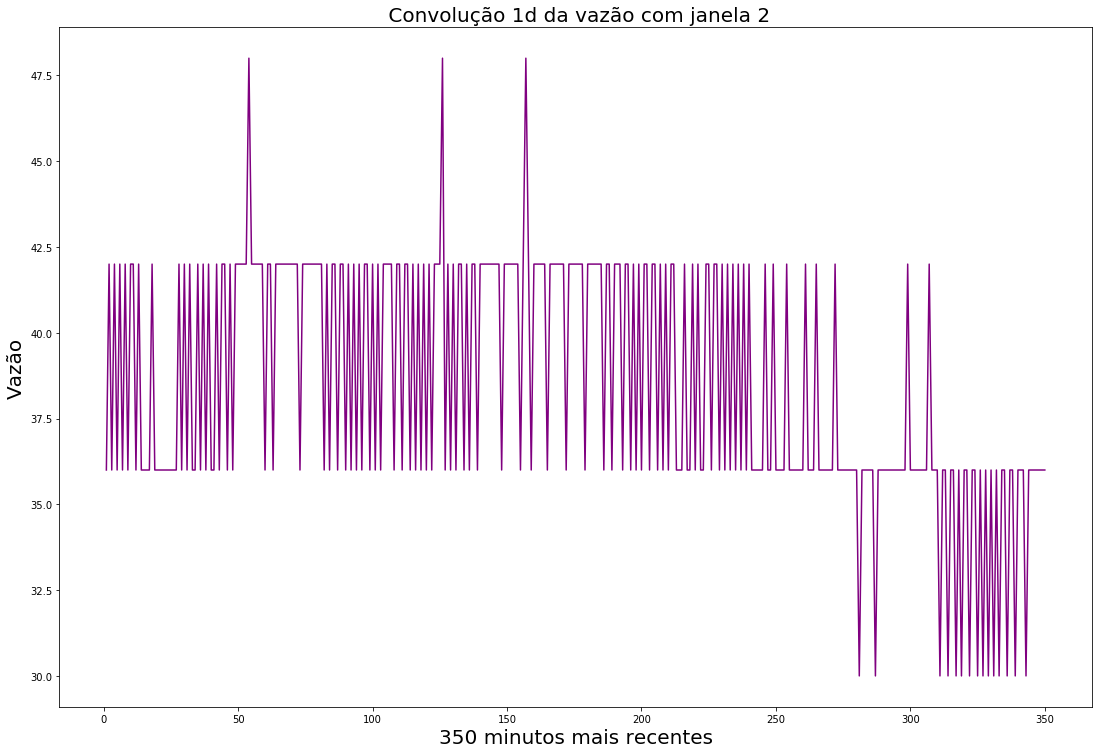

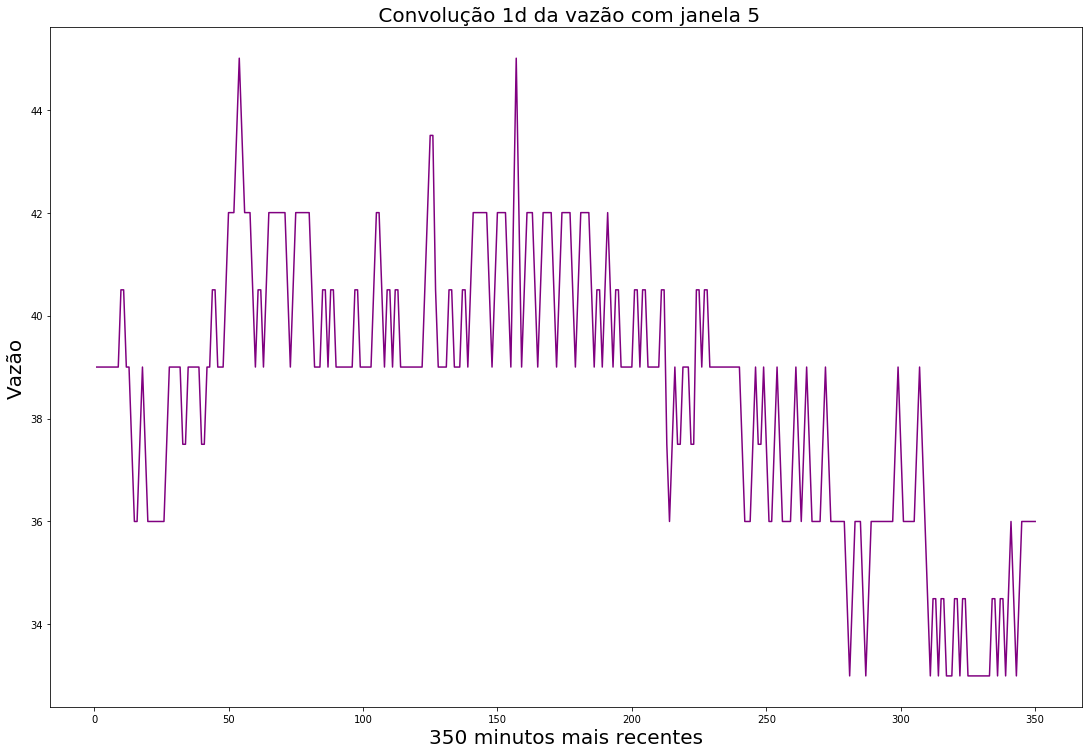

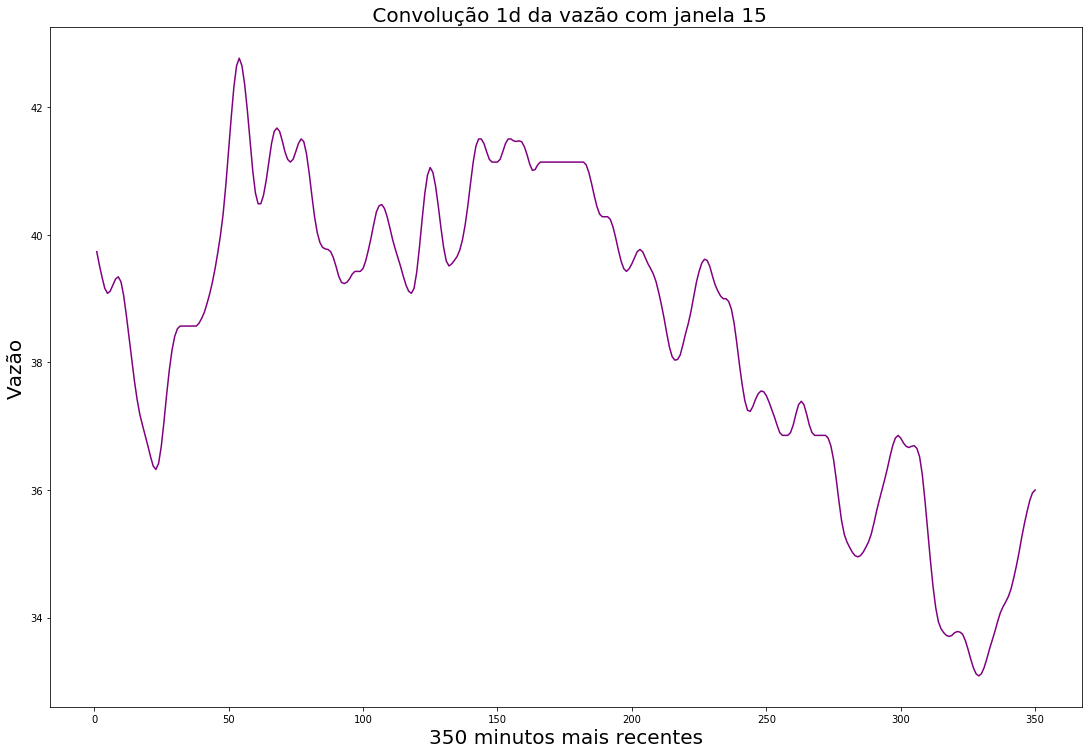

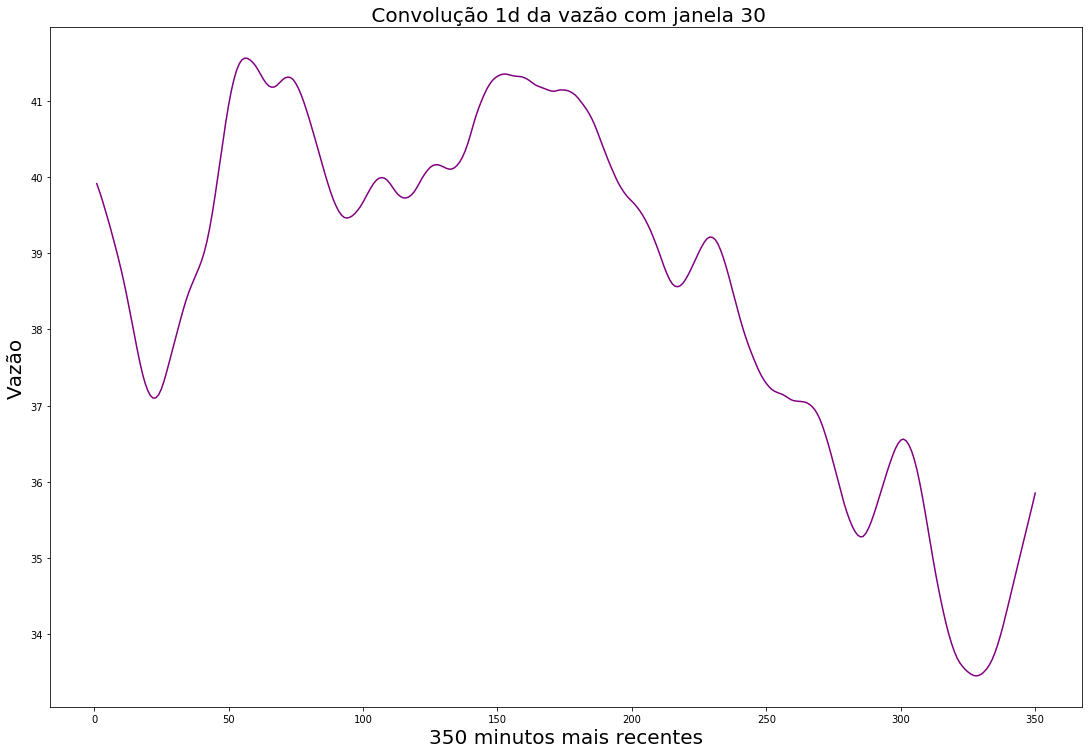

In [51]:
qtde_minutos = 350

plot_grafico1(data_convolution, qtde_minutos, 1)
plot_grafico1(data_convolution, qtde_minutos, 2)
plot_grafico1(data_convolution, qtde_minutos, 5)
plot_grafico1(data_convolution, qtde_minutos, 15)
plot_grafico1(data_convolution, qtde_minutos, 30)

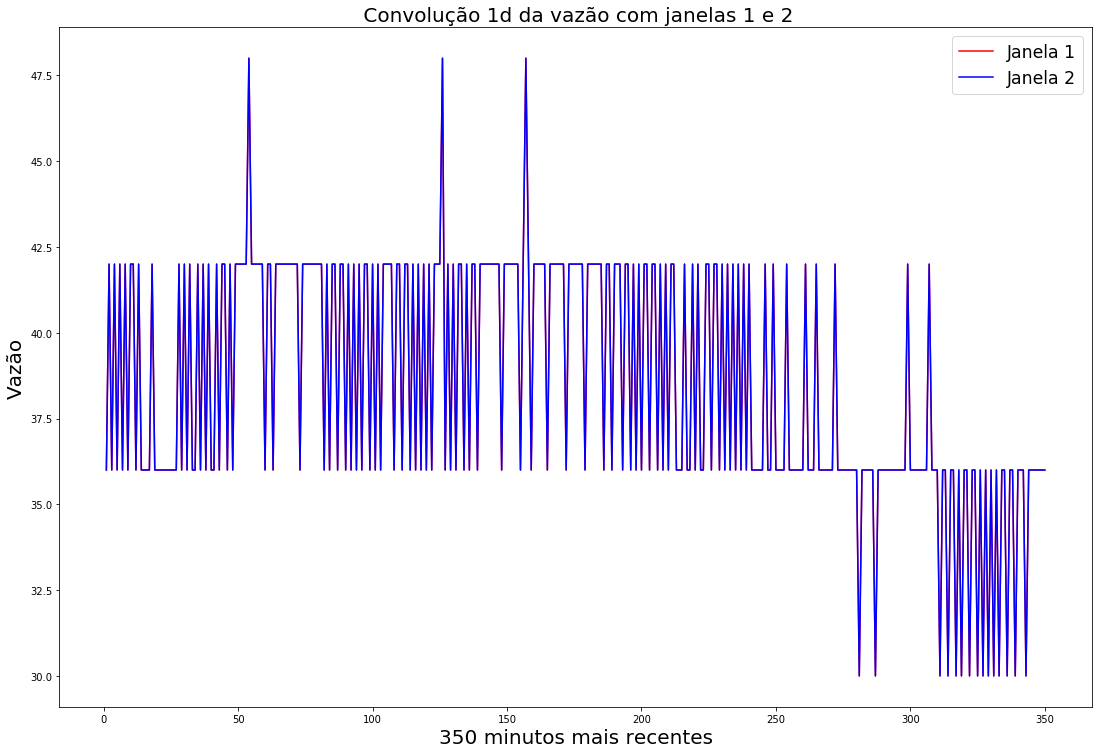

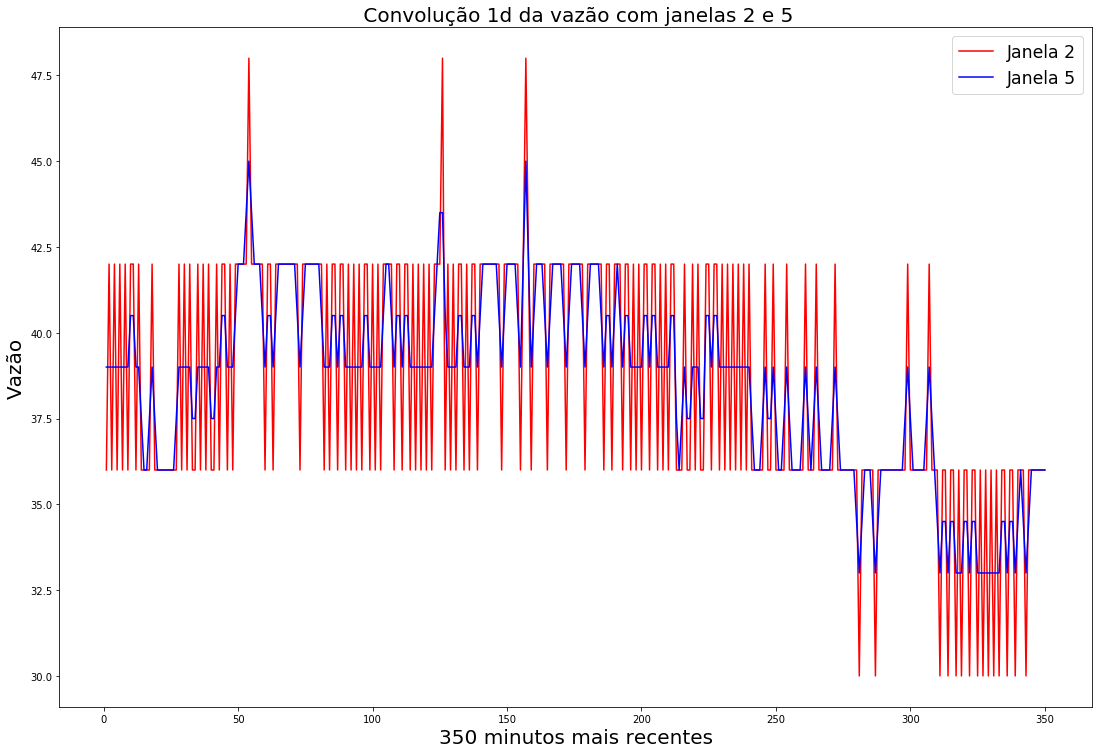

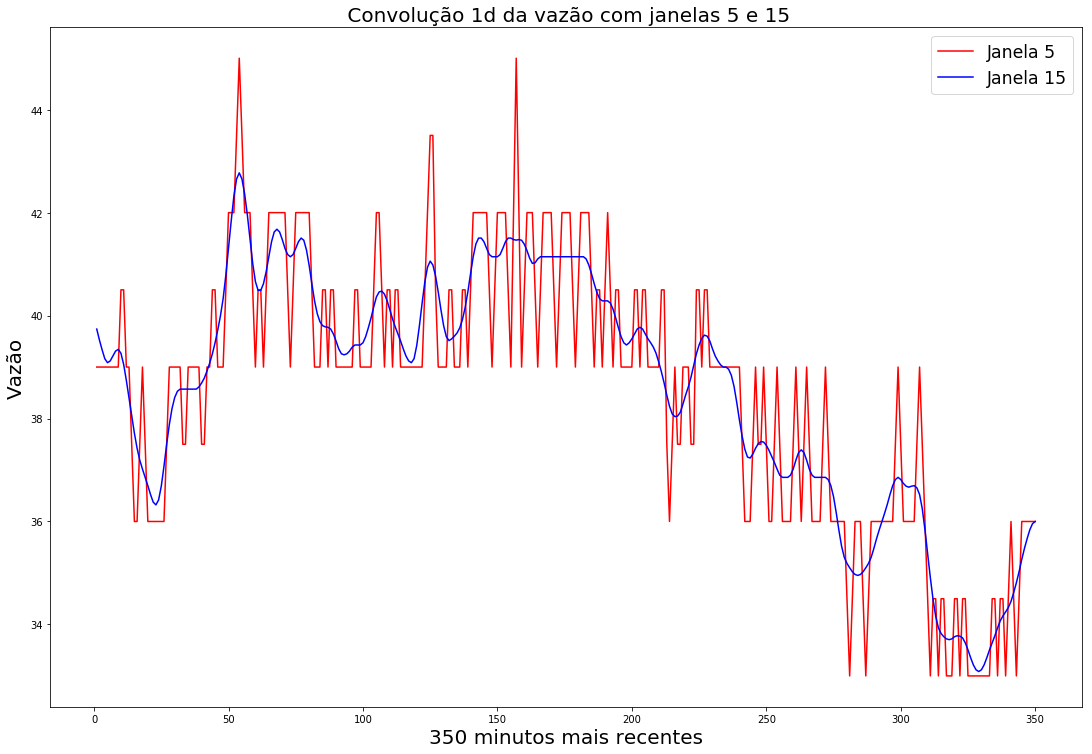

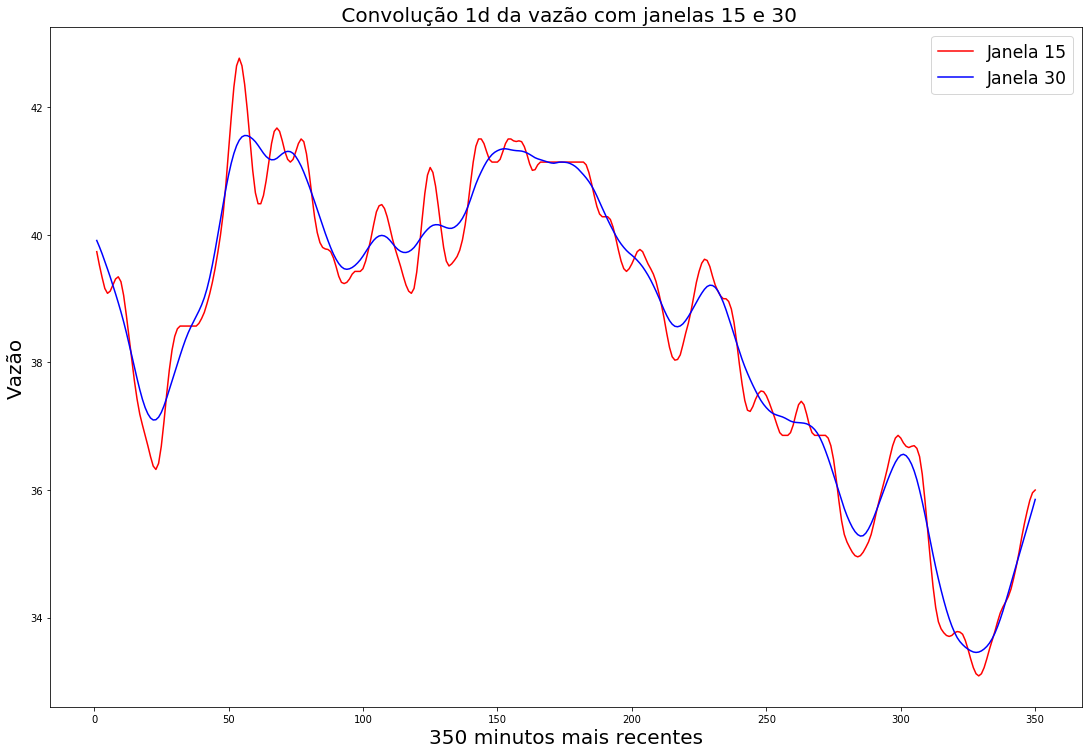

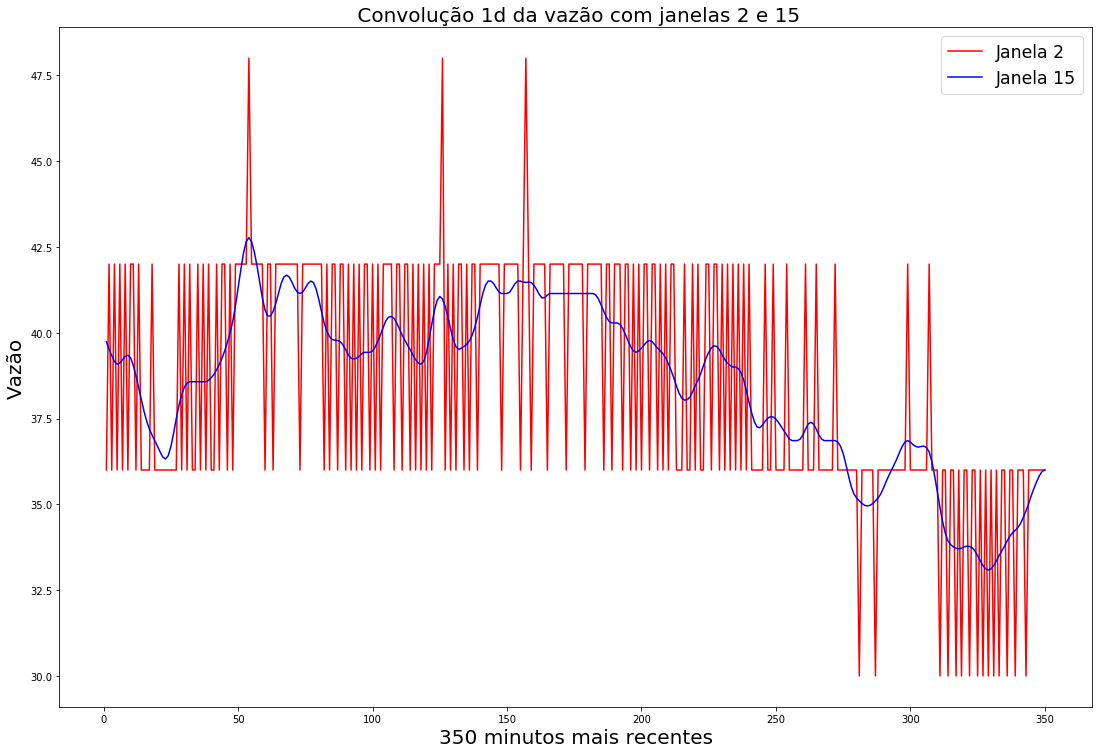

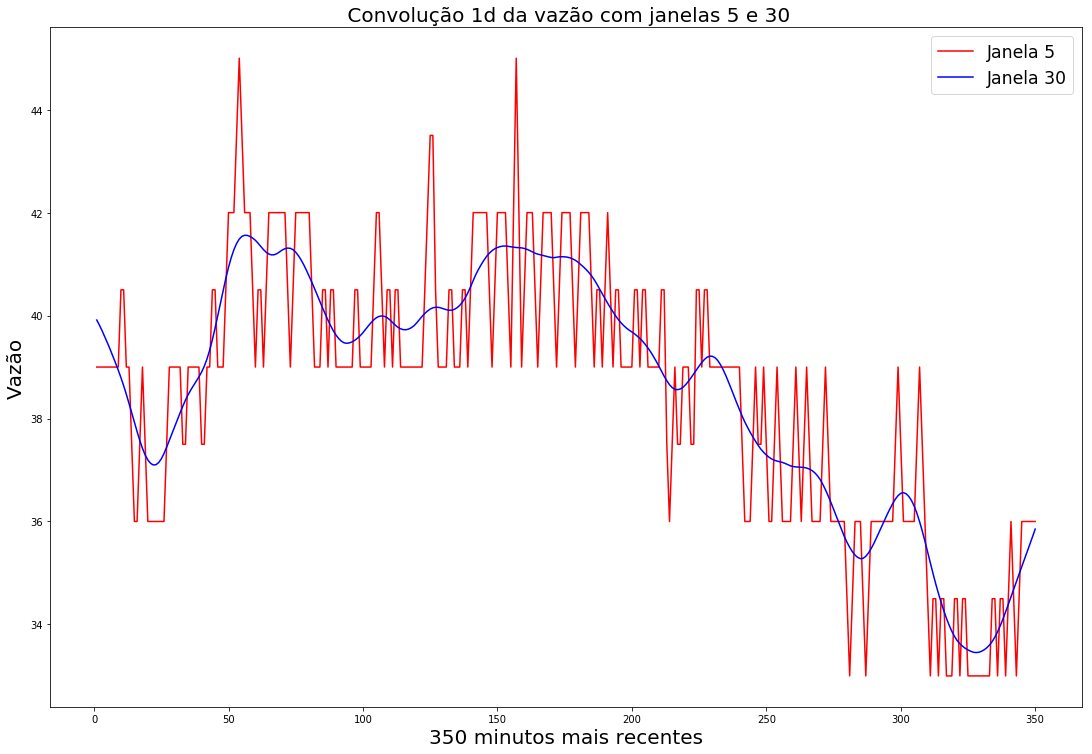

In [52]:
qtde_minutos = 350

plot_grafico2(data_convolution, qtde_minutos, 1, 2)
plot_grafico2(data_convolution, qtde_minutos, 2, 5)
plot_grafico2(data_convolution, qtde_minutos, 5, 15)
plot_grafico2(data_convolution, qtde_minutos, 15, 30)
plot_grafico2(data_convolution, qtde_minutos, 2, 15)
plot_grafico2(data_convolution, qtde_minutos, 5, 30)

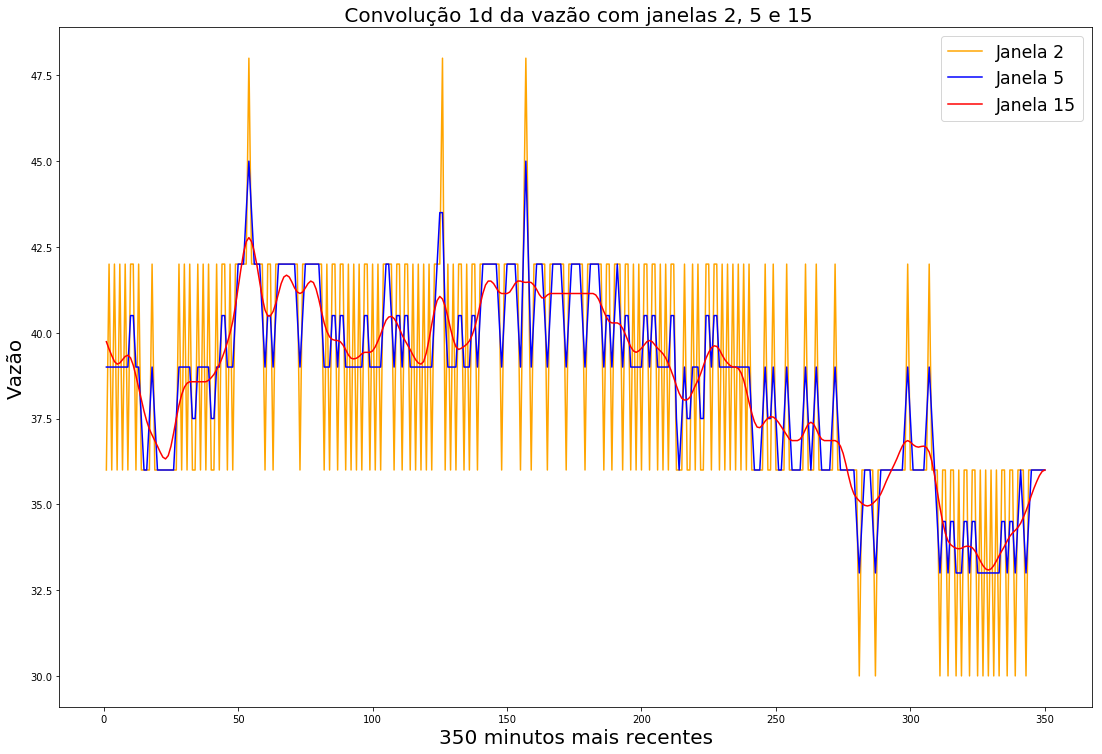

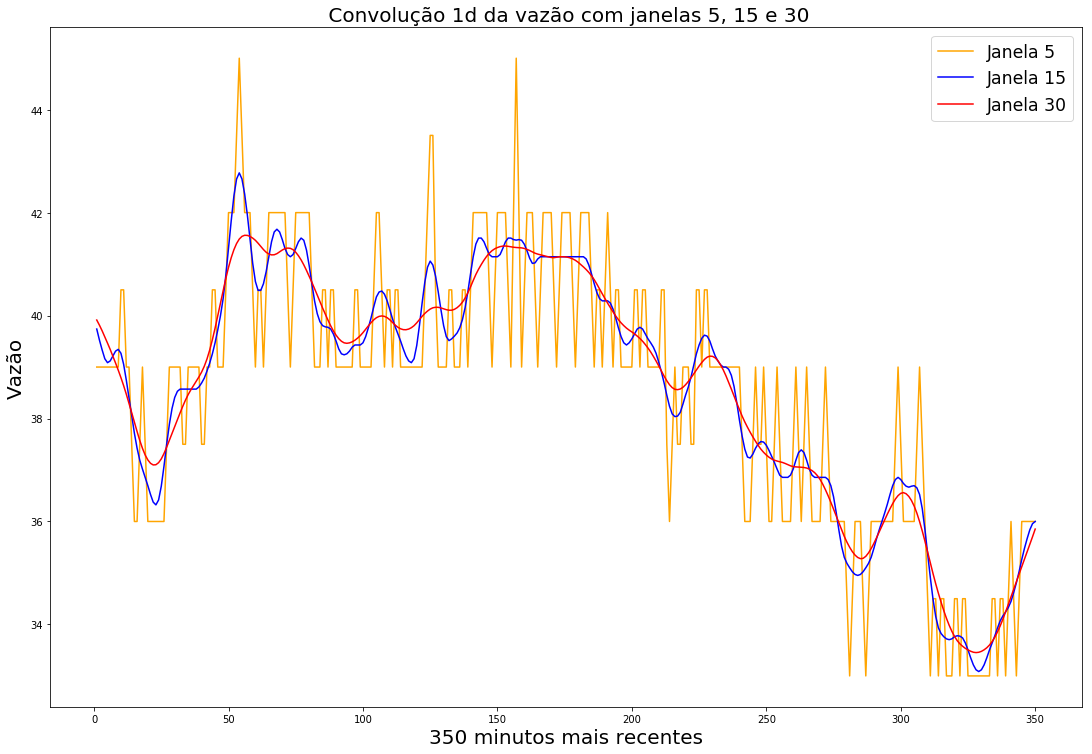

In [53]:
plot_grafico3(data_convolution, qtde_minutos, 2, 5, 15)
plot_grafico3(data_convolution, qtde_minutos, 5, 15, 30)